In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

merged_personal_df = pd.read_csv("./Resources/merged_personal_df.csv")

# Seperating merged df by years
mp_df = {}
for year, Year in zip([2014, 2015, 2016, 2017, 2018], ["2014", "2015", "2016", "2017", "2018"]):
    mpdata = merged_personal_df.loc[(merged_personal_df["Year"] == year)]
    mp_df[Year] = mpdata
mp_oakpark_df = merged_personal_df.loc[(merged_personal_df["ZipCode"] == 95817) | (merged_personal_df["ZipCode"] == 95820)]

In [2]:

# Linear regression function:
def plot_linear_regression(x_axis, y_axis, x_label, y_label, titles, filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print(f"The r-squared is: {rvalue**2}")
    print(f"The p-value is: {pvalue}")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    regress_values = x_axis * slope + intercept
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    # plt.annotate(line_eq, coords, fontsize=15, color="red")
    plt.title(titles)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(filename)
    plt.show()

## Outlier Detection and Elimination

In [3]:
# Do a box plot on the crime rate to show the outlier of 95837
cr_years = ["2014", "2015", "2016", "2017", "2018"]
crime_rate = []

for i in cr_years:
    crime_rate_pc = mp_df[i]["Crime Rate"]

    # Round it up to 2 decimal places
    quartiles = crime_rate_pc.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = (lowerq - (1.5*iqr)).round(2) 
    upper_bound = (upperq + (1.5*iqr)).round(2)

    # Determine outliers using upper and lower bounds
    # print(f"--------------------------------------------------------")
    print(f"The IQR data for {i}:")
    print(f" ")
    # print(f"The lower quartile: {lowerq}")
    print(f"The upper quartile: {upperq}")
    # print(f"The IQR: {iqr}")
    print(f" ")
    # print(f"***Crime rate lower than {lower_bound} would be outliers.")
    print(f"***Crime rate higher than {upper_bound} would be outliers.")
    print(f" ")
    print(f"--------------------------------------------------------")
    crime_rate.append(crime_rate_pc)

The IQR data for 2014:
 
The upper quartile: 0.33
 
***Crime rate higher than 0.82 would be outliers.
 
--------------------------------------------------------
The IQR data for 2015:
 
The upper quartile: 0.4
 
***Crime rate higher than 1.0 would be outliers.
 
--------------------------------------------------------
The IQR data for 2016:
 
The upper quartile: 0.58
 
***Crime rate higher than 1.44 would be outliers.
 
--------------------------------------------------------
The IQR data for 2017:
 
The upper quartile: 0.4
 
***Crime rate higher than 0.98 would be outliers.
 
--------------------------------------------------------
The IQR data for 2018:
 
The upper quartile: 0.62
 
***Crime rate higher than 1.54 would be outliers.
 
--------------------------------------------------------


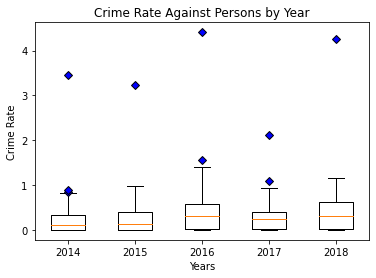

In [4]:
# Make a box plot
plt.subplots()
plt.title("Crime Rate Against Persons by Year")
plt.xlabel("Years")
plt.ylabel("Crime Rate")
blue_diamond = dict(markerfacecolor = "b", marker = "D")
plt.boxplot(crime_rate, flierprops = blue_diamond)
plt.xticks([1, 2, 3, 4, 5], cr_years)
plt.savefig("./Images/BoxPlot_2014-2018.png")
plt.show()

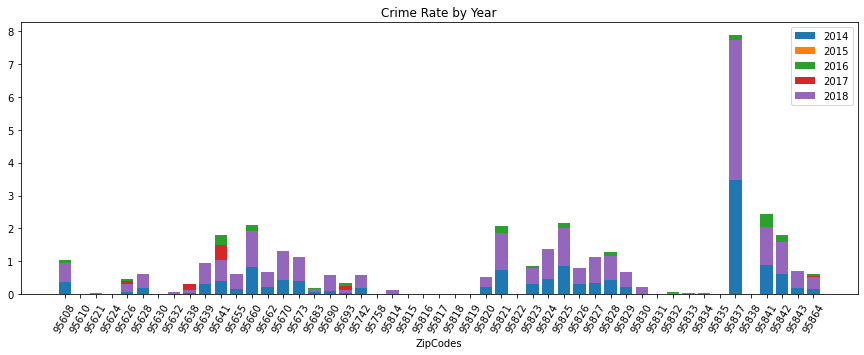

In [5]:
# Bar graph of crime rate by year to expose the obvious outlier
plt.figure(figsize=(15, 5))
xpos = np.arange(len(mp_df["2014"]["ZipCode"]))

plt.bar(xpos, mp_df["2014"]["Crime Rate"], align="center", label="2014")
plt.bar(xpos, mp_df["2015"]["Crime Rate"], align="center", bottom=mp_df["2014"]["Crime Rate"], label="2015")
plt.bar(xpos, mp_df["2016"]["Crime Rate"], align="center", bottom=mp_df["2014"]["Crime Rate"], label="2016")
plt.bar(xpos, mp_df["2017"]["Crime Rate"], align="center", bottom=mp_df["2014"]["Crime Rate"], label="2017")
plt.bar(xpos, mp_df["2018"]["Crime Rate"], align="center", bottom=mp_df["2014"]["Crime Rate"], label="2018")

plt.xticks(xpos, mp_df["2014"]["ZipCode"], rotation=60)
plt.title("Crime Rate by Year")
plt.xlabel("ZipCodes")
plt.legend()
plt.savefig("./Images/BarGraph_2014-2018.png")
plt.show()

In [6]:
# Drop the outlier zipcode 95837
no_outlier_mp_df = {}
for r in cr_years:
    nmpdata = mp_df[r].loc[(mp_df[r]["ZipCode"] != 95837)]
    no_outlier_mp_df[r] = nmpdata

## Crime Rate versus Median Home Value

The r-squared is: 0.16540805695601143
The p-value is: 0.004123031875343691


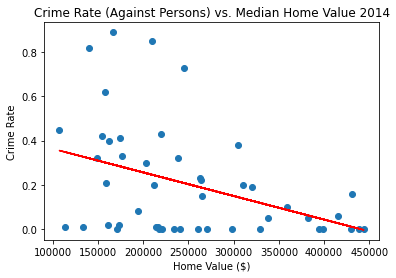

In [7]:
plot_linear_regression(no_outlier_mp_df["2014"]["Median Home Value"], no_outlier_mp_df["2014"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Against Persons) vs. Median Home Value 2014","./Images/cvh2014.png")

The r-squared is: 0.12507424384040924
The p-value is: 0.013667049949399032


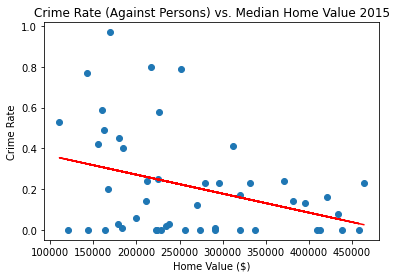

In [8]:
plot_linear_regression(no_outlier_mp_df["2015"]["Median Home Value"], no_outlier_mp_df["2015"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Against Persons) vs. Median Home Value 2015", "./Images/cvh2015.png")

The r-squared is: 0.14900930008134472
The p-value is: 0.006731922842384085


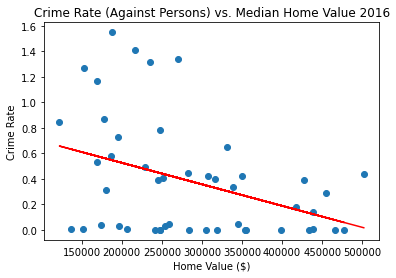

In [9]:
plot_linear_regression(no_outlier_mp_df["2016"]["Median Home Value"], no_outlier_mp_df["2016"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Against Persons) vs. Median Home Value 2016", "./Images/cvh2016.png")

The r-squared is: 0.12737436831656815
The p-value is: 0.012771707120387407


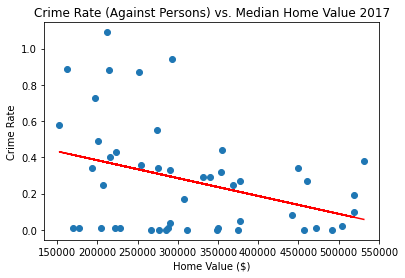

In [10]:
plot_linear_regression(no_outlier_mp_df["2017"]["Median Home Value"], no_outlier_mp_df["2017"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Against Persons) vs. Median Home Value 2017", "./Images/cvh2017.png")

The r-squared is: 0.17127788215005618
The p-value is: 0.0034550554399822757


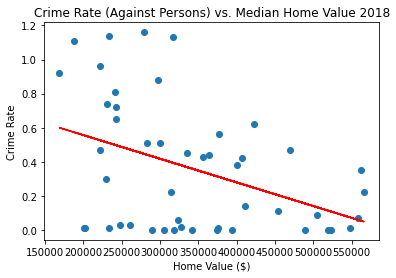

In [11]:
plot_linear_regression(no_outlier_mp_df["2018"]["Median Home Value"], no_outlier_mp_df["2018"]["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Against Persons) vs. Median Home Value 2018", "./Images/cvh2018.png")

## Crime Rate vs. Poverty Rate

The r-squared is: 0.09383499757106692
The p-value is: 0.03421423801977519


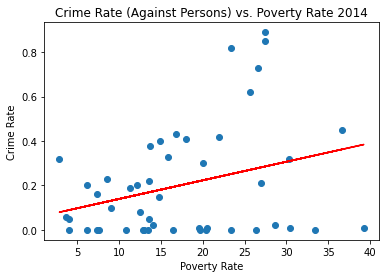

In [12]:
plot_linear_regression(no_outlier_mp_df["2014"]["Poverty Rate"], no_outlier_mp_df["2014"]["Crime Rate"], "Poverty Rate", "Crime Rate", "Crime Rate (Against Persons) vs. Poverty Rate 2014", "./Images/cvp2014.png")

The r-squared is: 0.11967889264933537
The p-value is: 0.016018470162578534


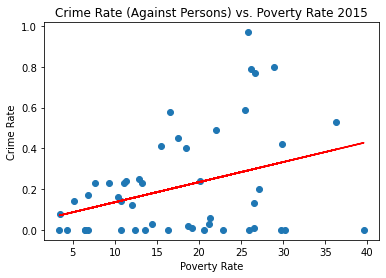

In [13]:
plot_linear_regression(no_outlier_mp_df["2015"]["Poverty Rate"], no_outlier_mp_df["2015"]["Crime Rate"], "Poverty Rate", "Crime Rate", "Crime Rate (Against Persons) vs. Poverty Rate 2015", "./Images/cvp2015.png")

The r-squared is: 0.1370698416600498
The p-value is: 0.009592809159926365


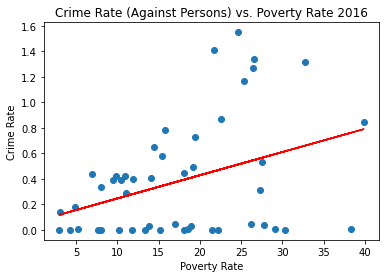

In [14]:
plot_linear_regression(no_outlier_mp_df["2016"]["Poverty Rate"], no_outlier_mp_df["2016"]["Crime Rate"], "Poverty Rate", "Crime Rate", "Crime Rate (Against Persons) vs. Poverty Rate 2016", "./Images/cvp2016.png")

The r-squared is: 0.09380775969574916
The p-value is: 0.034241631995791014


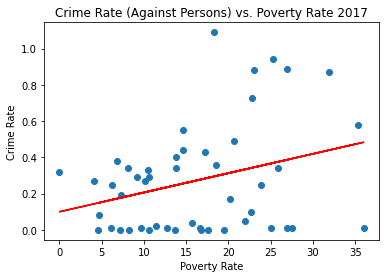

In [15]:
plot_linear_regression(no_outlier_mp_df["2017"]["Poverty Rate"], no_outlier_mp_df["2017"]["Crime Rate"], "Poverty Rate", "Crime Rate",  "Crime Rate (Against Persons) vs. Poverty Rate 2017", "./Images/cvp2017.png")

The r-squared is: 0.13382735076519672
The p-value is: 0.010557703001151528


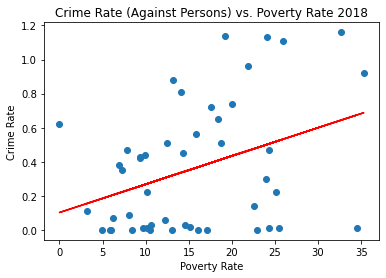

In [16]:
plot_linear_regression(no_outlier_mp_df["2018"]["Poverty Rate"], no_outlier_mp_df["2018"]["Crime Rate"], "Poverty Rate", "Crime Rate",  "Crime Rate (Against Persons) vs. Poverty Rate 2018", "./Images/cvp2018.png")

## Oak Park Scatter plots

The r-squared is: 0.4587039131319997
The p-value is: 0.03143570379819324


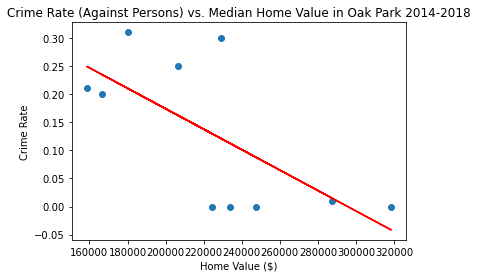

In [17]:
plot_linear_regression(mp_oakpark_df["Median Home Value"], mp_oakpark_df["Crime Rate"], "Home Value ($)", "Crime Rate", "Crime Rate (Against Persons) vs. Median Home Value in Oak Park 2014-2018", "./Images/cvh_oakpark_20142018.png")

The r-squared is: 0.23437018839298604
The p-value is: 0.1562371373220614


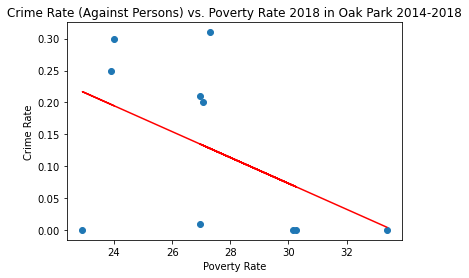

In [18]:
plot_linear_regression(mp_oakpark_df["Poverty Rate"], mp_oakpark_df["Crime Rate"], "Poverty Rate", "Crime Rate",  "Crime Rate (Against Persons) vs. Poverty Rate 2018 in Oak Park 2014-2018", "./Images/cvp_oakpark_20142018.png")